In [3]:
import sys
sys.path.append('/home/scarab5/Desktop/Pose-Estimation-for-Sensor-Calibration')

sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages')


import numpy as np
import os
import glob
from PIL import Image
# import pickle

# import rospy
from ur_msgs.srv import JointTrajectory, EndPose, JointStates

from matplotlib import pyplot as plt
from utils_realsense import RealSenseSensor

sys.path.append('/usr/lib/python2.7/dist-packages')
from realrobot_utils import *

In [ ]:
X_MIN = -0.5
X_MAX = 0.5
Y_MIN = -0.85
Y_MAX = -0.3
Z_MIN = 0.18
Z_MAX = 0.8

In [ ]:
X_WS_MIN = -0.3
X_WS_MAX = 0.3
Y_WS_MIN = -0.75
Y_WS_MAX = -0.35
Z_WS_MIN = 0.19
Z_WS_MAX = 0.25
ROBOT_WS_INIT = [0, -0.5, 0.65]
ROBOT_INIT_ROTATION = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]])

In [4]:
realsense = RealSenseSensor("025222072234")
K_rs = realsense._color_intrinsics
D_rs = 0

In [5]:
planUR5 = rospy.ServiceProxy('plan_robot_arm', JointTrajectory)
moveUR5 = rospy.ServiceProxy('move_robot_arm', JointTrajectory)
getEEFPose = rospy.ServiceProxy('get_eef_pose', EndPose)
getJointStates = rospy.ServiceProxy('get_joint_states', JointStates)

In [6]:
rospy.wait_for_service('plan_robot_arm')
rospy.wait_for_service('move_robot_arm')
rospy.wait_for_service('get_eef_pose')
rospy.wait_for_service('get_joint_states')

In [ ]:
plans = moveUR5(ARM_JOINT_NAME, None, ROBOT_WS_INIT)

In [26]:
def get_realsense_view(show_img=False):
    color, depth = realsense.frames(spatial=True, hole_filling=True, temporal=True)
    if show_img:
        plt.imshow(color)
        plt.show()
    return color, depth

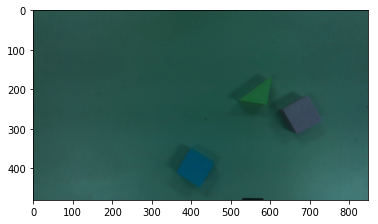

In [90]:
color, depth = get_realsense_view()
plt.imshow(color)

In [28]:
img_list = [f for f in os.listdir('scenes') if '.png' in f]
num_colors = len([f for f in img_list if 'color' in f])
num_depths = len([f for f in img_list if 'depth' in f])

In [29]:
print('color images:', num_colors)
print('depth images:', num_depths)

color images: 0
depth images: 0


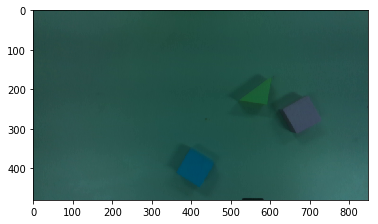

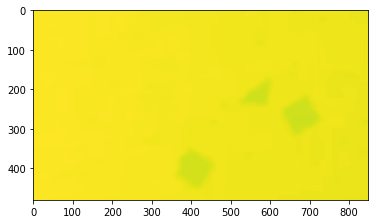

50 images.


In [79]:
if num_colors==num_depths:
    color, depth = get_realsense_view()
    Image.fromarray(color).save('scenes/color_%d.png' %num_colors)
    np.save('scenes/depth_%d' %num_depths, depth)
    plt.imshow(color)
    plt.show()
    plt.imshow(depth)
    plt.show()
    
    num_colors += 1
    num_depths += 1
    print(num_colors, 'images.')

In [ ]:
from sklearn.cluster import SpectralClusteringb

In [81]:
backsub = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

In [85]:
img_list = [f for f in os.listdir('scenes') if '.png' in f]
colors_list = [f for f in img_list if 'color' in f]
# depths_list = [f for f in img_list if 'depth' in f]

In [89]:
for color in colors_list:
    img = Image.open(os.path.join('scenes', color))
    backsub.apply(np.array(img))

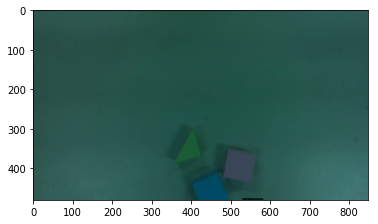

In [93]:
color, depth = get_realsense_view()
plt.imshow(color)

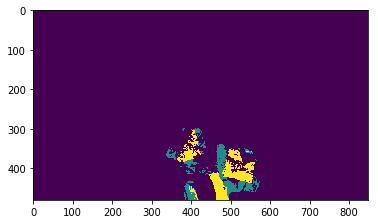

In [94]:
plt.imshow(backsub.apply(color, 0, 0))

In [97]:
depth.max()

0.656

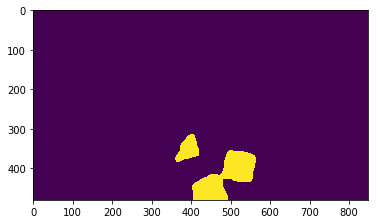

In [114]:
plt.imshow(depth<0.625)